In [1]:
# auto-mpg_v2.csv 데이터 읽어오기
# train 70% test 30%로 구분하여 조회
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./files_new/auto_mpg_v2.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
# 사용할 변수들 : mpg, cylinders, horsepower, weight
ndf = df[["mpg","cylinders","horsepower","weight"]]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
387,27.0,4,86.0,2790.0
388,44.0,4,52.0,2130.0
389,32.0,4,84.0,2295.0
390,28.0,4,79.0,2625.0


In [4]:
# 예측 모델
x = ndf[["weight"]]
y = ndf["mpg"]

In [5]:
x

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
387,2790.0
388,2130.0
389,2295.0
390,2625.0


In [6]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [7]:
# 필요한 라이브러리 불러오기
# 학습 모델 검증을 위한 라이브러리
from sklearn.model_selection import train_test_split

In [8]:
# test_size : 검증 데이터 비율(나머지 훈련데이터 비율)
# random_state : 랜덤하게 뽑아내기 위한 시드값
# train : 훈련(학습)데이터
# test : 검증(test)데이터
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)

In [9]:
x_train

,weight
37,4209.0
170,2223.0
275,3410.0
194,2164.0
352,2615.0
...,...
369,1980.0
320,2110.0
15,2833.0
125,2901.0


In [10]:
x_test

,weight
241,2720.0
366,2525.0
298,3420.0
341,1760.0
263,4080.0
...,...
378,1965.0
20,2672.0
187,3962.0
59,2408.0


In [11]:
y_train

37     14.0
170    25.0
275    16.2
194    24.5
352    32.9
       ... 
369    36.0
320    46.6
15     22.0
125    19.0
265    27.5
Name: mpg, Length: 274, dtype: float64

In [12]:
y_test

241    21.5
366    29.0
298    23.9
341    35.1
263    17.5
       ... 
378    32.0
20     25.0
187    15.5
59     20.0
225    19.0
Name: mpg, Length: 118, dtype: float64

In [13]:
# 선형회귀분석 모듈
from sklearn.linear_model import LinearRegression

In [14]:
# 다항식으로 변환하는 모듈(2차원으로 변환해서 사용함)
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# 2차원으로 변환
poly = PolynomialFeatures(degree = 2)

In [16]:
x_train_poly = poly.fit_transform(x_train)

In [17]:
x_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [18]:
# 결정계수 확인
pr = LinearRegression()

In [19]:
pr.fit(x_train_poly,y_train)

LinearRegression()

In [20]:
# 검증
x_test_poly = poly.fit_transform(x_test)

In [21]:
# 학습시킨 모델에 검증 데이터를 넣어서 검정계수 확인하기
pr.score(x_test_poly, y_test)

0.708700926297548

In [22]:
y_hat_test = pr.predict(x_test_poly)

In [23]:
y_hat_test

array([24.66536039, 26.54410041, 18.98929297, 35.16662957, 15.16790147,
       18.81747781, 16.22268456, 12.13891111, 28.49938194, 29.10996986,
       19.58220208, 18.90655573, 24.66536039, 25.95221677, 14.32710701,
       17.35492396, 23.01149434, 29.74264161, 13.93651453, 14.01775932,
       14.54825345, 32.36444573, 21.06709395, 15.28558567, 17.22850081,
       13.10967497, 16.7150811 , 30.69055618, 20.10211401, 25.34395031,
       20.3420599 , 20.51667773, 25.56444733, 22.09451299, 21.61847493,
       31.37450508, 32.42344474, 20.43293981, 16.73784551, 25.05905632,
       20.50904814, 22.32842989, 30.86039258, 20.36473385, 20.98069295,
       13.04395831, 15.1585788 , 33.74299018, 20.94155617, 30.07438659,
       29.25077822, 13.5126894 , 22.01989315, 14.3956548 , 16.82944872,
       23.61816563, 22.92491785, 30.0854976 , 30.81502786, 24.66536039,
       32.01224181, 26.37515376, 18.28199056, 22.65869766, 25.1821336 ,
       35.0034357 , 12.32397221, 22.6160658 , 20.06493787, 14.94

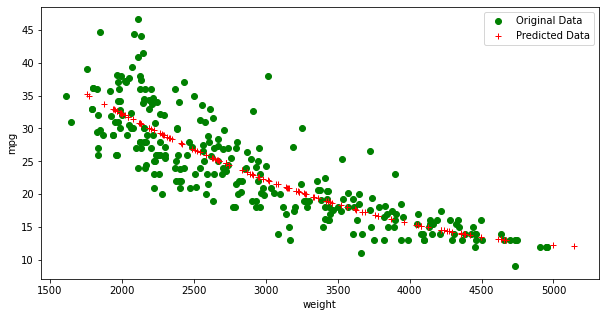

In [24]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train, y_train, "go", label = "Original Data")
ax.plot(x_test, y_hat_test, "r+", label = "Predicted Data")

ax.legend(loc = "best")

plt.xlabel("weight")
plt.ylabel("mpg")

plt.show()
plt.close()

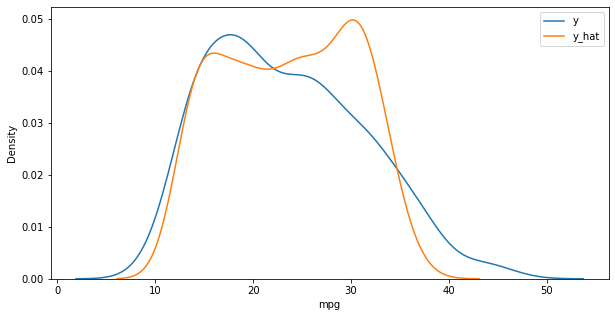

In [25]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

plt.figure(figsize  = (10, 5))

ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_hat, label = "y_hat", ax = ax1)

plt.legend()
plt.show()